In [2]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [5]:
df = pd.read_csv("../data/crabs.csv") 
df.head(2)

Unnamed: 0 sp sex  index   FL   RW    CL    CW   BD
0           1  B   M      1  8.1  6.7  16.1  19.0  7.0
1           2  B   M      2  8.8  7.7  18.1  20.8  7.4

In [7]:
# Sélection des variables quantitatives et conversion en forme verticale
x = df.iloc[:,4:9].values
x

array([[ 8.1,  6.7, 16.1, 19. ,  7. ],
       [ 8.8,  7.7, 18.1, 20.8,  7.4],
       [ 9.2,  7.8, 19. , 22.4,  7.7],
       [ 9.6,  7.9, 20.1, 23.1,  8.2],
       [ 9.8,  8. , 20.3, 23. ,  8.2],
       [10.8,  9. , 23. , 26.5,  9.8],
       [11.1,  9.9, 23.8, 27.1,  9.8],
       [11.6,  9.1, 24.5, 28.4, 10.4],
       [11.8,  9.6, 24.2, 27.8,  9.7],
       [11.8, 10.5, 25.2, 29.3, 10.3],
       [12.2, 10.8, 27.3, 31.6, 10.9],
       [12.3, 11. , 26.8, 31.5, 11.4],
       [12.6, 10. , 27.7, 31.7, 11.4],
       [12.8, 10.2, 27.2, 31.8, 10.9],
       [12.8, 10.9, 27.4, 31.5, 11. ],
       [12.9, 11. , 26.8, 30.9, 11.4],
       [13.1, 10.6, 28.2, 32.3, 11. ],
       [13.1, 10.9, 28.3, 32.4, 11.2],
       [13.3, 11.1, 27.8, 32.3, 11.3],
       [13.9, 11.1, 29.2, 33.3, 12.1],
       [14.3, 11.6, 31.3, 35.5, 12.7],
       [14.6, 11.3, 31.9, 36.4, 13.7],
       [15. , 10.9, 31.4, 36.4, 13.2],
       [15. , 11.5, 32.4, 37. , 13.4],
       [15. , 11.9, 32.5, 37.2, 13.6],
       [15.2, 12.1, 32.3,

In [8]:
y = df.iloc[:,1:4].values
y

array([['B', 'M', 1],
       ['B', 'M', 2],
       ['B', 'M', 3],
       ['B', 'M', 4],
       ['B', 'M', 5],
       ['B', 'M', 6],
       ['B', 'M', 7],
       ['B', 'M', 8],
       ['B', 'M', 9],
       ['B', 'M', 10],
       ['B', 'M', 11],
       ['B', 'M', 12],
       ['B', 'M', 13],
       ['B', 'M', 14],
       ['B', 'M', 15],
       ['B', 'M', 16],
       ['B', 'M', 17],
       ['B', 'M', 18],
       ['B', 'M', 19],
       ['B', 'M', 20],
       ['B', 'M', 21],
       ['B', 'M', 22],
       ['B', 'M', 23],
       ['B', 'M', 24],
       ['B', 'M', 25],
       ['B', 'M', 26],
       ['B', 'M', 27],
       ['B', 'M', 28],
       ['B', 'M', 29],
       ['B', 'M', 30],
       ['B', 'M', 31],
       ['B', 'M', 32],
       ['B', 'M', 33],
       ['B', 'M', 34],
       ['B', 'M', 35],
       ['B', 'M', 36],
       ['B', 'M', 37],
       ['B', 'M', 38],
       ['B', 'M', 39],
       ['B', 'M', 40],
       ['B', 'M', 41],
       ['B', 'M', 42],
       ['B', 'M', 43],
       ['B', 'M', 44

In [9]:
# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler

In [10]:
# Application de la fonction StandardScaler (mean = 0 et standard deviation = 1)
x = StandardScaler().fit_transform(x)
x

array([[-2.14623182e+00, -2.35244988e+00, -2.25392649e+00,
        -2.21777180e+00, -2.05798865e+00],
       [-1.94546178e+00, -1.96287468e+00, -1.97228249e+00,
        -1.98853816e+00, -1.94089947e+00],
       [-1.83073603e+00, -1.92391716e+00, -1.84554270e+00,
        -1.78477492e+00, -1.85308259e+00],
       [-1.71601029e+00, -1.88495963e+00, -1.69063850e+00,
        -1.69562851e+00, -1.70672111e+00],
       [-1.65864742e+00, -1.84600211e+00, -1.66247410e+00,
        -1.70836371e+00, -1.70672111e+00],
       [-1.37183306e+00, -1.45642691e+00, -1.28225470e+00,
        -1.26263163e+00, -1.23836441e+00],
       [-1.28578876e+00, -1.10580922e+00, -1.16959711e+00,
        -1.18622042e+00, -1.23836441e+00],
       [-1.14238158e+00, -1.41746939e+00, -1.07102171e+00,
        -1.02066279e+00, -1.06273064e+00],
       [-1.08501871e+00, -1.22268178e+00, -1.11326831e+00,
        -1.09707400e+00, -1.26763670e+00],
       [-1.08501871e+00, -8.72064099e-01, -9.72446308e-01,
        -9.06045967e-01

In [11]:
# Vérification
import numpy as np
print("La moyenne : ",np.mean(x,axis=0))
print("L'écart type : ",np.std(x,axis=0))

La moyenne :  [-7.10542736e-17  6.03961325e-16  1.06581410e-16 -4.97379915e-16
  0.00000000e+00]
L'écart type :  [1. 1. 1. 1. 1.]


In [24]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full')
coord = acp.fit_transform(x)

#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

5


In [18]:
# Projection sur 2 axes
pca = sklearnPCA(n_components = 2)

PCA(n_components=2)

In [16]:
# Prédiction des scores des deux facteurs retenus
principalComponents = pca.fit_transform(x)

In [17]:
# Visualisation de la matrice dans le nouveau repére
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

Axe principal 1  Axe principal 2
0         4.927573        -0.268445
1         4.386176        -0.094074

In [19]:
# Constitution de la matrice finale avec la variable qualitative
# axis : {0/’index’, 1/’columns’}, default 0

finaldf = pd.concat([principaldf, df[['sp']]], axis = 1)
finaldf.head(2)

Axe principal 1  Axe principal 2 sp
0         4.927573        -0.268445  B
1         4.386176        -0.094074  B

In [20]:
import matplotlib.pyplot as plt

In [21]:
finaldf.sp.unique()

array(['B', 'O'], dtype=object)

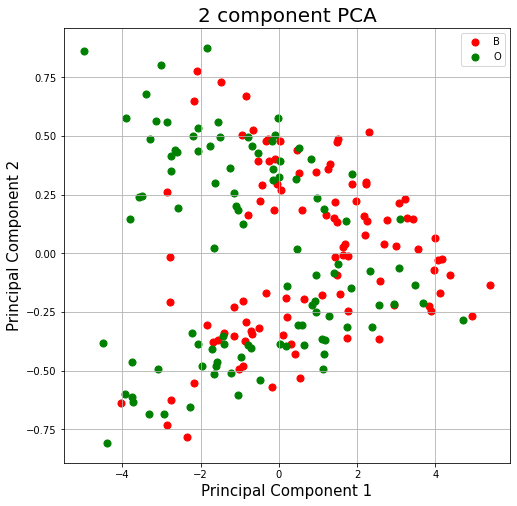

In [22]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B', 'O']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    # L'indice est True dans le cas ou le nom d'espèce correspond à "target" et sera donc en couleur "color"
    indicesToKeep = finaldf['sp'] == target
    # print(indicesToKeep.shape)
    # Loc[ligne, colonne] : ici loc prend uniquement les lignes qui correspondent à True
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()